In [1]:
#Importing libraries
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import datetime as dt
from datetime import datetime
import pandas as pd
import yfinance as yf
# import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Convolution2D, Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Dense
import keras.metrics as metrics
import prettytable
from prettytable import PrettyTable
from keras.layers import AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.metrics import classification_report
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf
from keras import regularizers
from keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

## Download MSFT Historical Stock data from Yahoo Finance

In [2]:
# Get Microsoft stock MSFT_df from yahoo finance
stock = yf.Ticker("MSFT")
MSFT_total = stock.history(period="max")
MSFT_total

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055241,0.063365,0.055241,0.060657,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060657,0.063907,0.060657,0.062823,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062823,0.064448,0.062823,0.063907,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063907,0.064448,0.061740,0.062281,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062281,0.062823,0.060657,0.061198,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-17 00:00:00-04:00,289.929993,291.600006,286.160004,288.799988,23836200,0.0,0.0
2023-04-18 00:00:00-04:00,291.570007,291.760010,287.010010,288.369995,20161800,0.0,0.0
2023-04-19 00:00:00-04:00,285.989990,289.049988,284.540009,288.450012,17150300,0.0,0.0


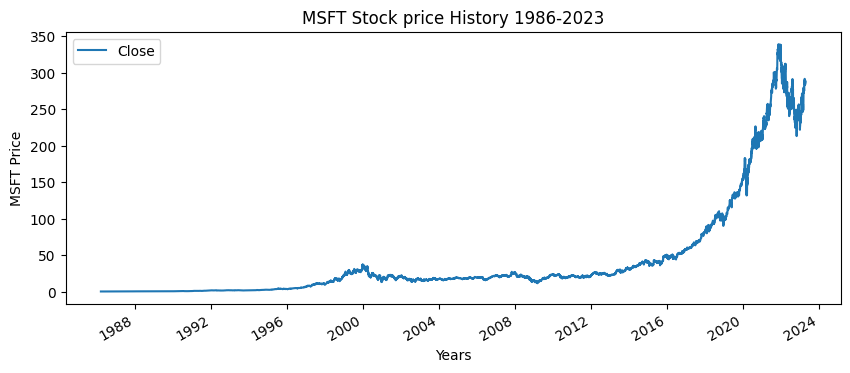

In [10]:
MSFT_total["Close"].plot(figsize=(10,4))
plt.xlabel("Years")
plt.ylabel("MSFT Price")
plt.title("MSFT Stock price History 1986-2023")
plt.legend()
plt.show()

### Stock Split History

In [4]:
stock_split = stock.splits
stock_split_df = pd.DataFrame(stock_split)
stock_split_df

,Stock Splits
Date,
1987-09-21 00:00:00-04:00,2.0
1990-04-16 00:00:00-04:00,2.0
1991-06-27 00:00:00-04:00,1.5
1992-06-15 00:00:00-04:00,1.5
1994-05-23 00:00:00-04:00,2.0
1996-12-09 00:00:00-05:00,2.0
1998-02-23 00:00:00-05:00,2.0
1999-03-29 00:00:00-05:00,2.0
2003-02-18 00:00:00-05:00,2.0


## MSFT Stock Price History from 2013 - 2023

In [5]:
# import yfinance as yf
# Fetch daily stock price MSFT_df of MSFT
MSFT_df = yf.download('MSFT','2013-01-01','2023-03-31')
MSFT_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,27.250000,27.730000,27.150000,27.620001,22.717781,52899300
2013-01-03,27.629999,27.650000,27.160000,27.250000,22.413456,48294400
2013-01-04,27.270000,27.340000,26.730000,26.740000,21.993973,52521100
2013-01-07,26.770000,26.879999,26.639999,26.690001,21.952848,37110400
2013-01-08,26.750000,26.790001,26.459999,26.549999,21.837702,44703100
...,...,...,...,...,...,...
2023-03-24,277.239990,280.630005,275.279999,280.570007,280.570007,28172000
2023-03-27,280.500000,281.459991,275.519989,276.380005,276.380005,26840200
2023-03-28,275.790009,276.140015,272.049988,275.230011,275.230011,21878600


## Date Time Conversion

In [6]:
MSFT_df.reset_index(inplace=True)
MSFT_df["Date"] = pd.to_datetime(MSFT_df['Date']).dt.date
MSFT_df = MSFT_df.set_index("Date")
MSFT_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,27.250000,27.730000,27.150000,27.620001,22.717781,52899300
2013-01-03,27.629999,27.650000,27.160000,27.250000,22.413456,48294400
2013-01-04,27.270000,27.340000,26.730000,26.740000,21.993973,52521100
2013-01-07,26.770000,26.879999,26.639999,26.690001,21.952848,37110400
2013-01-08,26.750000,26.790001,26.459999,26.549999,21.837702,44703100
...,...,...,...,...,...,...
2023-03-24,277.239990,280.630005,275.279999,280.570007,280.570007,28172000
2023-03-27,280.500000,281.459991,275.519989,276.380005,276.380005,26840200
2023-03-28,275.790009,276.140015,272.049988,275.230011,275.230011,21878600


## Microsoft Stock price ranges

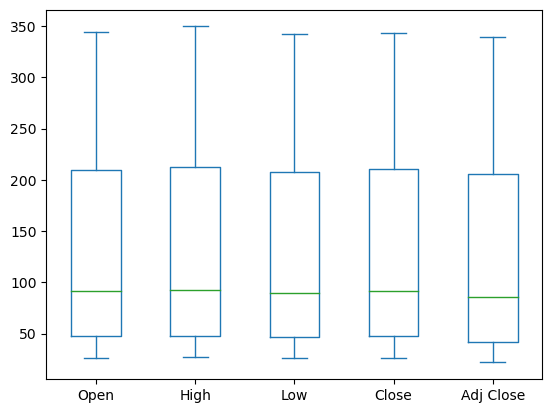

In [ ]:
MSFT_df[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')
plt.show()

## Data Description

In [8]:
MSFT_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2579 entries, 2013-01-02 to 2023-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2579 non-null   float64
 1   High       2579 non-null   float64
 2   Low        2579 non-null   float64
 3   Close      2579 non-null   float64
 4   Adj Close  2579 non-null   float64
 5   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 141.0+ KB


# Null values

In [9]:
MSFT_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Descriptive Statistics

In [ ]:
MSFT_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,124.914762,126.176320,123.607635,124.957309,120.267382,3.226082e+07
std,91.077395,92.088544,90.000557,91.089221,91.995271,1.669165e+07
min,26.490000,26.750000,26.280001,26.459999,21.763672,7.425600e+06
25%,47.285000,47.719999,46.725000,47.325001,41.504751,2.248075e+07
50%,91.209999,92.730003,89.739998,91.489998,86.138306,2.835630e+07
75%,210.060005,212.300003,208.044998,210.195000,205.401108,3.672330e+07
max,344.619995,349.670013,342.200012,343.109985,339.075562,2.484285e+08


## MSFT Closing Price from 2013-2023

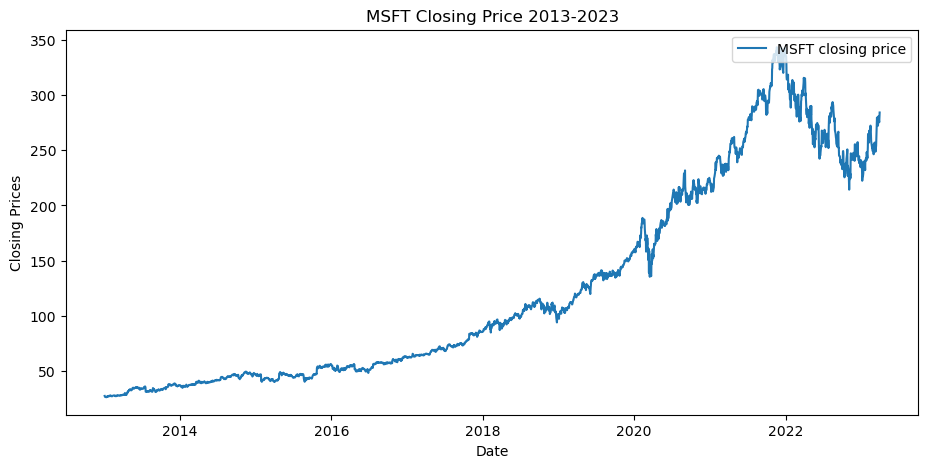

In [ ]:
MSFT_df['Close'].plot(figsize=(11,5))
plt.title('MSFT' + ' Closing Price 2013-2023', fontsize = 12)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend(['MSFT closing price'],loc='upper right')
plt.show()

## Trend Indicators - Simple Moving Averages, Exponential Moving Averages

## Simple Moving Average(SMA)

SMA= A1+A2+....+An/n

where:
A=Closing prices for n days
n=Number of time periods

Simple moving averages (SMAs) are used to chart the long-term trajectory of a stock or other security, while ignoring the noise of day-to-day price movements. This allows MSFT_dfaders to compare medium- and long-term MSFT_dfends over a larger time horizon. For example, if the 200-day SMA of a security falls below its 50-day SMA, this is usually interpreted as a bearish death cross pattern and a signal of further declines. The opposite pattern, the golden cross, indicates potential for a market rally.

In [ ]:
# Calculate simple moving average using .rolling(window).() , with window size = 30 & 60

MSFT_df['SMA30'] = MSFT_df['Close'].rolling(30).mean()
MSFT_df['SMA60'] = MSFT_df['Close'].rolling(60).mean()
MSFT_df

# Remove all the NULL values using dropna() method
MSFT_df.dropna(inplace=True)

# Calculate the EMA creating a MSFT_dfframe

MSFT_df['EMA 30']= MSFT_df['Close'].ewm(span=30, adjust=False).mean()
MSFT_df['EMA 60']= MSFT_df['Close'].ewm(span=60, adjust=False).mean()

# Print MSFT_df
MSFT_df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30,SMA60,EMA 30,EMA 60
Date,,,,,,,,,,
2013-03-28,28.320000,28.660000,28.260000,28.610001,23.726896,55453800,28.013000,27.686167,28.610001,28.610001
2013-04-01,28.639999,28.660000,28.360001,28.610001,23.726896,29201100,28.032000,27.702667,28.610001,28.610001
2013-04-02,28.590000,28.850000,28.520000,28.799999,23.884472,28456500,28.058333,27.728500,28.622259,28.616230
2013-04-03,28.750000,28.950001,28.540001,28.559999,23.685432,35062800,28.075333,27.758833,28.618242,28.614386
2013-04-04,28.389999,28.610001,28.270000,28.600000,23.718603,45263200,28.099667,27.790667,28.617065,28.613915


## Simple Moving Average Ribbons

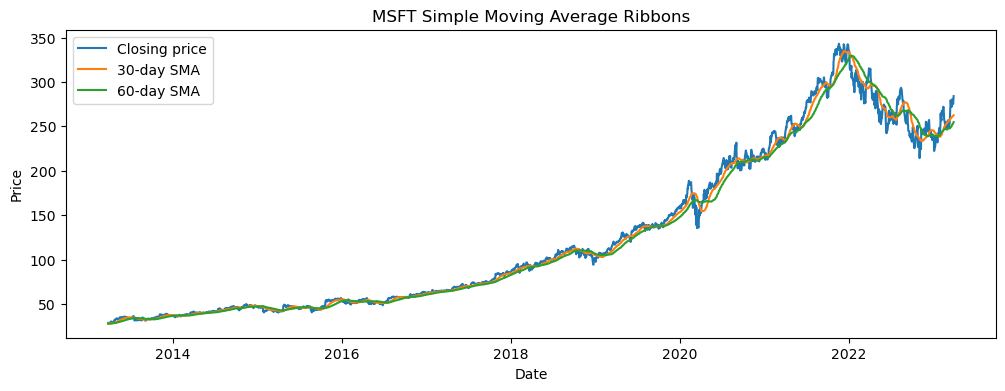

In [ ]:
MSFT_df['Close'].plot(kind= "line",label='Closing price', figsize=(12,4))
MSFT_df['SMA30'].plot(kind= "line",label='30-day SMA')
MSFT_df['SMA60'].plot(kind= "line",label='60-day SMA')
plt.title("MSFT Simple Moving Average Ribbons", fontsize = 12)
#plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

## Exponential Moving Averages Ribbons

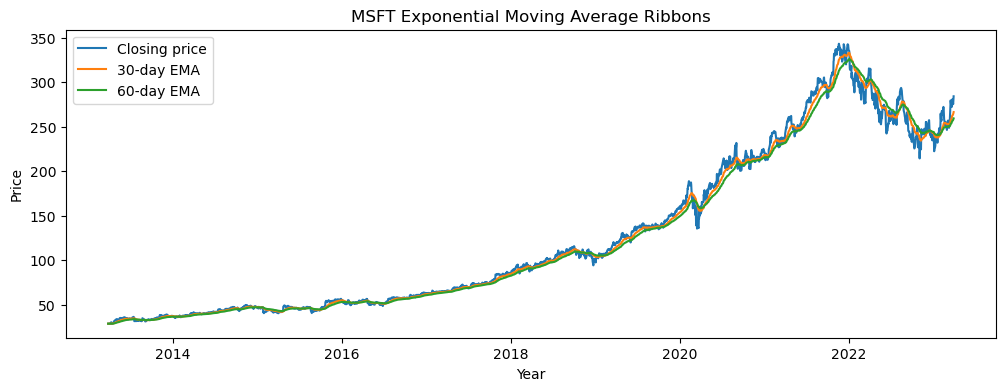

In [ ]:
MSFT_df['Close'].plot(kind= "line",label='Closing price', figsize=(12,4))
MSFT_df['EMA 30'].plot(kind= "line",label='30-day EMA')
MSFT_df['EMA 60'].plot(kind= "line",label='60-day EMA')
plt.title("MSFT Exponential Moving Average Ribbons", fontsize = 12)
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import logging
import re
import warnings
logging.captureWarnings(True)
warnings.filterwarnings('always', category=DeprecationWarning,
                        module=r'^{0}\.'.format(re.escape(__name__)))
warnings.warn("This is a DeprecationWarning",category=DeprecationWarning)

## NEURAL PROPHET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet
from datetime import date, timedelta, datetime

In [ ]:
micro_df = yf.download('MSFT','2013-01-01','2023-03-31')
micro_df = micro_df.reset_index()
micro_df["Date"] = pd.to_datetime(micro_df['Date']).dt.date
micro_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,27.250000,27.730000,27.150000,27.620001,22.717791,52899300
1,2013-01-03,27.629999,27.650000,27.160000,27.250000,22.413456,48294400
2,2013-01-04,27.270000,27.340000,26.730000,26.740000,21.993980,52521100
3,2013-01-07,26.770000,26.879999,26.639999,26.690001,21.952854,37110400
4,2013-01-08,26.750000,26.790001,26.459999,26.549999,21.837690,44703100
...,...,...,...,...,...,...,...
2574,2023-03-24,277.239990,280.630005,275.279999,280.570007,280.570007,28172000
2575,2023-03-27,280.500000,281.459991,275.519989,276.380005,276.380005,26840200
2576,2023-03-28,275.790009,276.140015,272.049988,275.230011,275.230011,21878600
2577,2023-03-29,278.959991,281.140015,278.410004,280.510010,280.510010,25087000


In [ ]:
df = micro_df[["Date", "Close"]]
df.rename(columns={"Date": "ds", "Close": "y"}, inplace=True)
df

,ds,y
0,2013-01-02,27.620001
1,2013-01-03,27.250000
2,2013-01-04,26.740000
3,2013-01-07,26.690001
4,2013-01-08,26.549999
...,...,...
2574,2023-03-24,280.570007
2575,2023-03-27,276.380005
2576,2023-03-28,275.230011
2577,2023-03-29,280.510010


## Predictions for the next 1 year

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.355% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 147


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.27E-01, min: 8.28E-01


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.20E-01, min: 1.54E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.57E-01
Epoch[147/147]: 100%|██████████| 147/147 [00:14<00:00, 10.46it/s, SmoothL1Loss=0.00121, MAE=8.16, RMSE=12.8, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.355% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.807% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.807% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


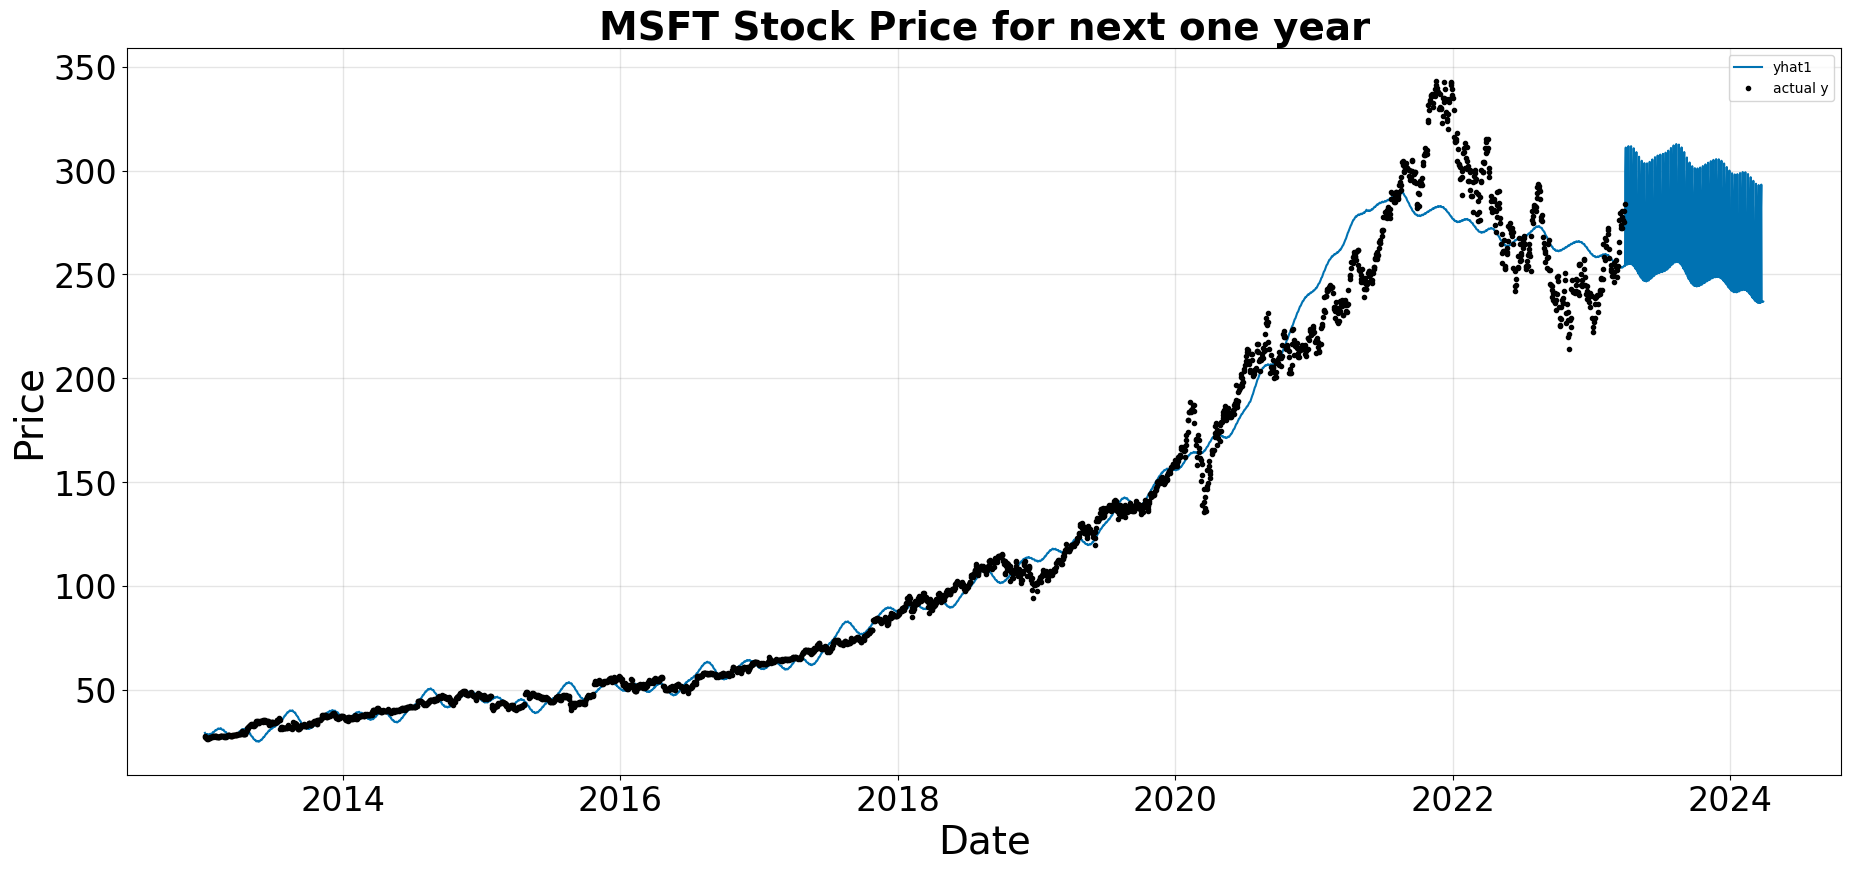

In [ ]:
model = NeuralProphet()

metrics = model.fit(df, freq="D")

# Generate predictions for the future data
future = model.make_future_dataframe(df, periods=365, n_historic_predictions=len(df))

forecast = model.predict(future)

# Plot the actual vs predicted values

fig, ax = plt.subplots(figsize=(18,8))
model.plot(forecast, xlabel="Date", ylabel="Price", ax=ax)
ax.xaxis.label.set_size(28)
ax.yaxis.label.set_size(28)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_title("MSFT Stock Price for next one year", fontsize=28, fontweight="bold")
plt.show()

## Predictions for the next 60 days

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.355% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 147


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.46E-01, min: 1.79E+00


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.27E-01, min: 2.44E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.44E-01
Epoch[147/147]: 100%|██████████| 147/147 [00:13<00:00, 11.09it/s, SmoothL1Loss=0.00121, MAE=8.15, RMSE=12.9, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.355% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - d
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.438% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - d
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.438% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - d


<Figure size 2000x400 with 0 Axes>

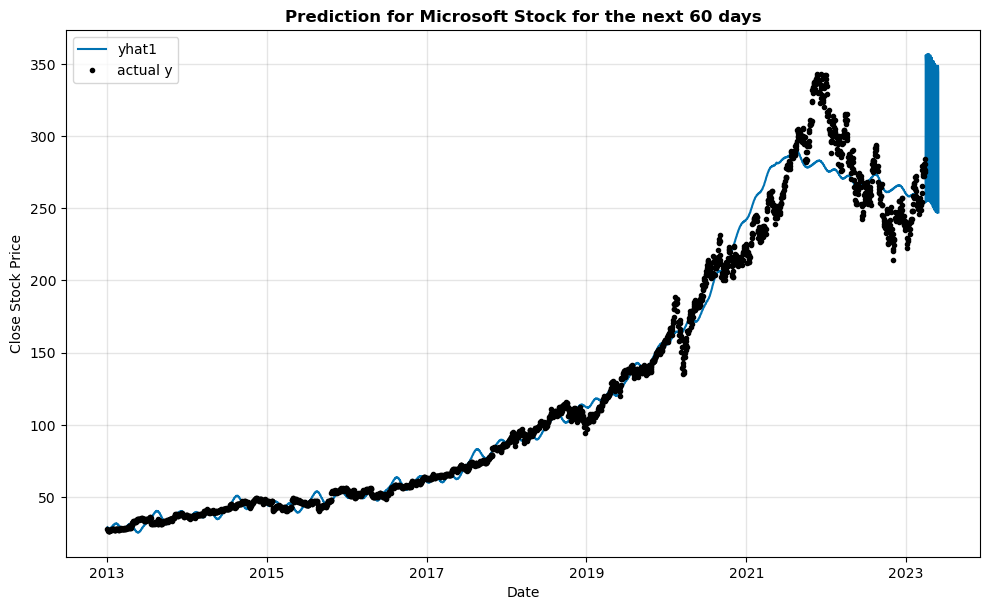

In [ ]:
model = NeuralProphet()

metrics = model.fit(df, freq="d")

# Predictions
future = model.make_future_dataframe(df, periods=60, n_historic_predictions=len(df)) #we need to specify the number of days in future

prediction = model.predict(future)

# Plotting
plt.figure(figsize=(20,4))
forecast = model.plot(prediction)
plt.title("Prediction for Microsoft Stock for the next 60 days", fontsize=12, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

## Neural Prophet Evaluation Metrics

In [ ]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.647342,283.808250,344.979043,0.0
1,0.398959,207.540525,252.863802,0.0
2,0.208060,145.790976,173.549624,0.0
3,0.089185,98.376771,112.483020,0.0
4,0.031940,58.593089,66.849242,0.0
...,...,...,...,...
142,0.001252,8.414248,13.143490,0.0
143,0.001242,8.459873,13.002877,0.0
144,0.001225,8.220319,13.037854,0.0
145,0.001214,8.163227,12.944698,0.0


In [ ]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss
146,0.001211,8.153888,12.904163,0.0


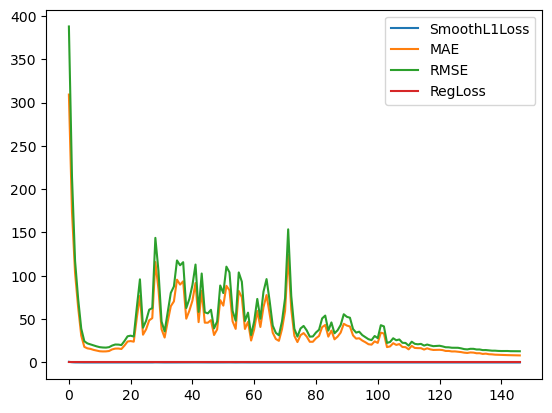

In [ ]:
metrics.plot(kind='line')
plt.show()

## Neural Prophet Forecast Components

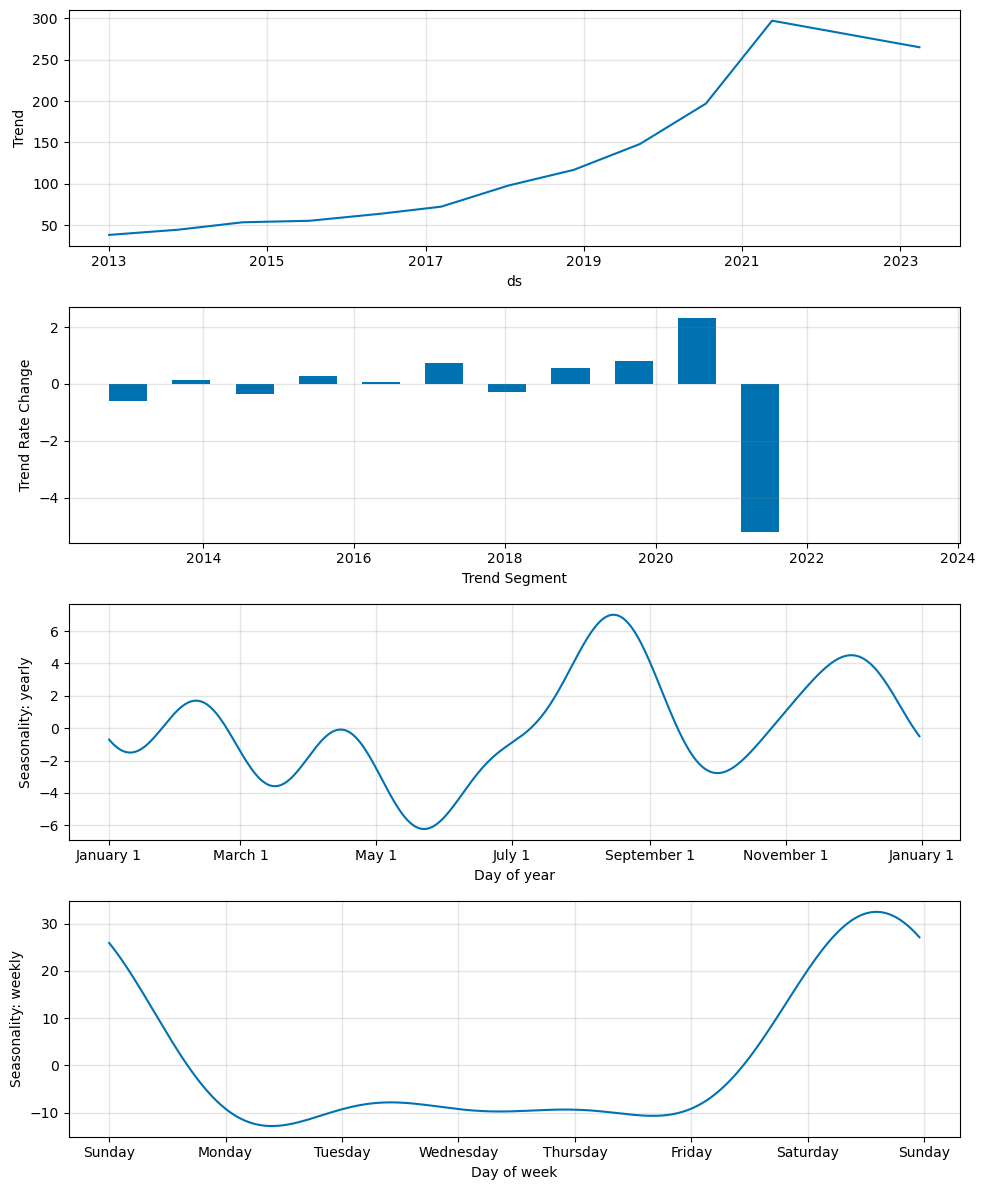

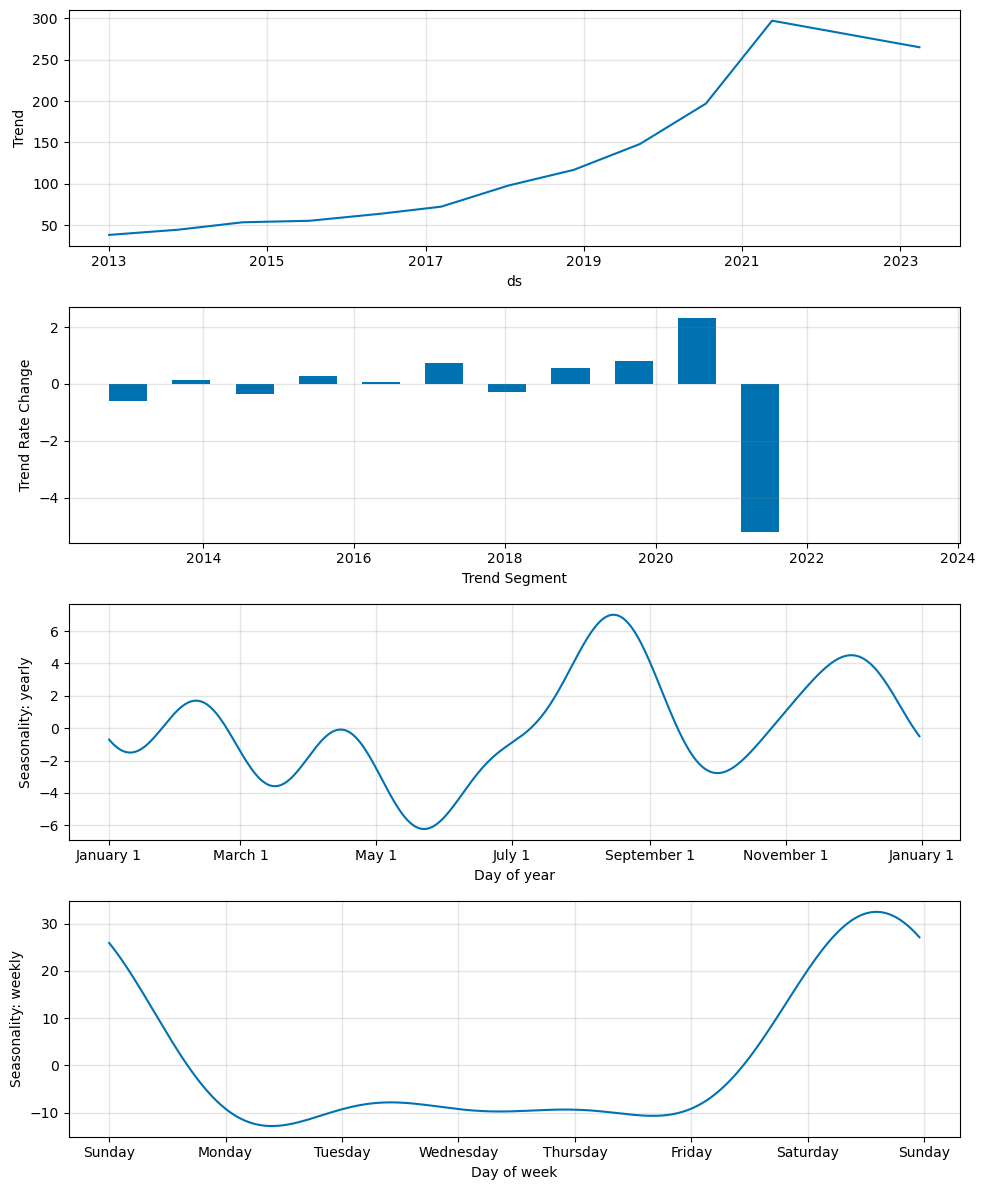

In [ ]:
model.plot_parameters()

## RNN MODELS

In [ ]:
lstm_df = yf.download('MSFT','2013-01-01','2023-03-31')
lstm_df = lstm_df.reset_index()
lstm_df["Date"] = pd.to_datetime(lstm_df['Date']).dt.date
lstm_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,27.250000,27.730000,27.150000,27.620001,22.717783,52899300
1,2013-01-03,27.629999,27.650000,27.160000,27.250000,22.413454,48294400
2,2013-01-04,27.270000,27.340000,26.730000,26.740000,21.993973,52521100
3,2013-01-07,26.770000,26.879999,26.639999,26.690001,21.952850,37110400
4,2013-01-08,26.750000,26.790001,26.459999,26.549999,21.837692,44703100
...,...,...,...,...,...,...,...
2574,2023-03-24,277.239990,280.630005,275.279999,280.570007,280.570007,28172000
2575,2023-03-27,280.500000,281.459991,275.519989,276.380005,276.380005,26840200
2576,2023-03-28,275.790009,276.140015,272.049988,275.230011,275.230011,21878600
2577,2023-03-29,278.959991,281.140015,278.410004,280.510010,280.510010,25087000


### Data Pre-processing

In [ ]:
# select the 'Close' column as the target variable
data = lstm_df.filter(['Close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model on
training_data_len = int(np.ceil(0.8 * len(dataset)))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# create the training data set
train_data = scaled_data[0:training_data_len, :]

# Creating a data structure with 60 time-steps and split the data into x_train and y_train datasets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
# convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
test_data = scaled_data[training_data_len-60:, :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2004, 60, 1)
y_train.shape =  (2004,)
x_test.shape =  (515, 60, 1)
y_test.shape =  (515, 1)


## LSTM MODEL 

In [ ]:
# Build the LSTM model
model1 = Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(LSTM(50, return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(25))
model1.add(Dense(1))

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error',metrics=['MAE'])

model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_16 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_34 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
 dense_23 (Dense)            (None, 25)                1275      
                                                                 
 dense_24 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-tra

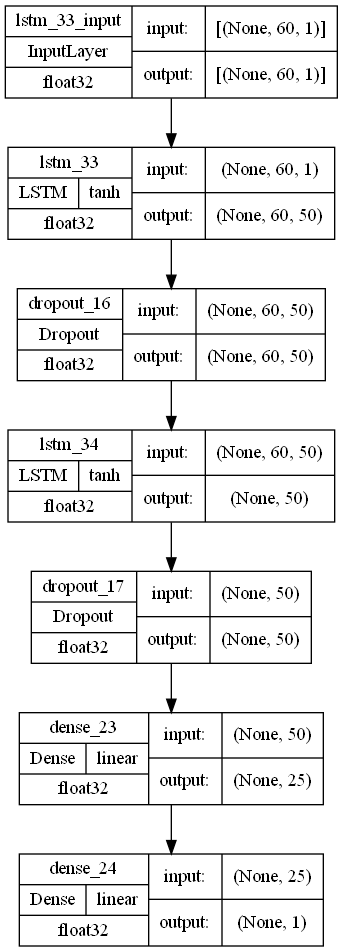

In [ ]:
tf.keras.utils.plot_model(
	model1,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)

In [ ]:
# Train the model
history1 = model1.fit(x_train, y_train,epochs=50, batch_size=32 , validation_split=0.25,  verbose=1 , shuffle=True)

Epoch 1/50
47/47 [==============================] - 4s 42ms/step - loss: 0.0015 - MAE: 0.0259 - val_loss: 5.0380e-04 - val_MAE: 0.0156
Epoch 2/50
47/47 [==============================] - 2s 33ms/step - loss: 1.7548e-04 - MAE: 0.0091 - val_loss: 6.2732e-04 - val_MAE: 0.0206
Epoch 3/50
47/47 [==============================] - 2s 38ms/step - loss: 1.4972e-04 - MAE: 0.0083 - val_loss: 7.1214e-04 - val_MAE: 0.0223
Epoch 4/50
47/47 [==============================] - 2s 33ms/step - loss: 1.2203e-04 - MAE: 0.0076 - val_loss: 4.7713e-04 - val_MAE: 0.0151
Epoch 5/50
47/47 [==============================] - 1s 31ms/step - loss: 1.2268e-04 - MAE: 0.0077 - val_loss: 4.3296e-04 - val_MAE: 0.0147
Epoch 6/50
47/47 [==============================] - 1s 31ms/step - loss: 1.1386e-04 - MAE: 0.0077 - val_loss: 4.0728e-04 - val_MAE: 0.0142
Epoch 7/50
47/47 [==============================] - 1s 30ms/step - loss: 1.0590e-04 - MAE: 0.0072 - val_loss: 4.1814e-04 - val_MAE: 0.0142
Epoch 8/50
47/47 [=============

## MODEL EVALUATION

In [ ]:
predictions1 = model1.predict(x_test)
predictions1 = scaler.inverse_transform(predictions1)
#predictions

17/17 [==============================] - 0s 11ms/step


In [ ]:
# Model Accuracy

print('Mean Absolute Error =',history1.history['MAE'][-1])
print("Loss =", history1.history['loss'][-1])

Mean Absolute Error = 0.00608946243301034
Loss = 7.177415682235733e-05


In [ ]:
rmse = np.sqrt(np.mean(predictions1 - y_test)**2)
mse = np.mean(predictions1 - y_test)**2
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predictions1, multioutput='variance_weighted')
print('RMSE : ',rmse)
print('MSE : ',mse)
print('R2 : ',R2)

RMSE :  2.0462493600197207
MSE :  4.1871364433811165
R2 :  0.9233665109977625


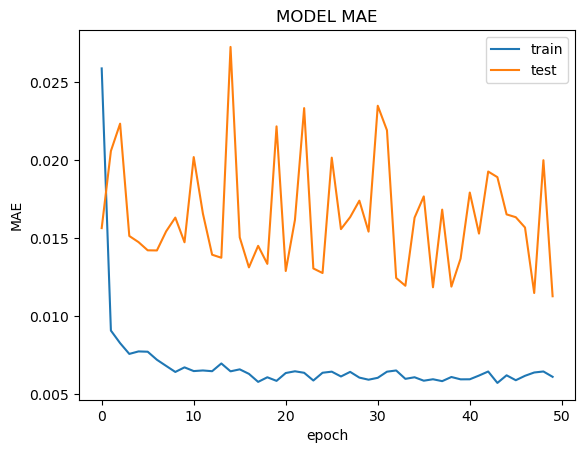

In [ ]:
# summarize history for loss
plt.plot(history1.history['MAE'])
plt.plot(history1.history['val_MAE'])
plt.title('MODEL MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

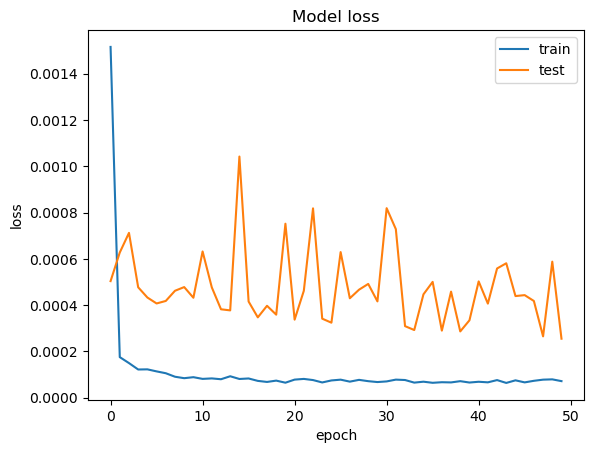

In [ ]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Plot the predictions

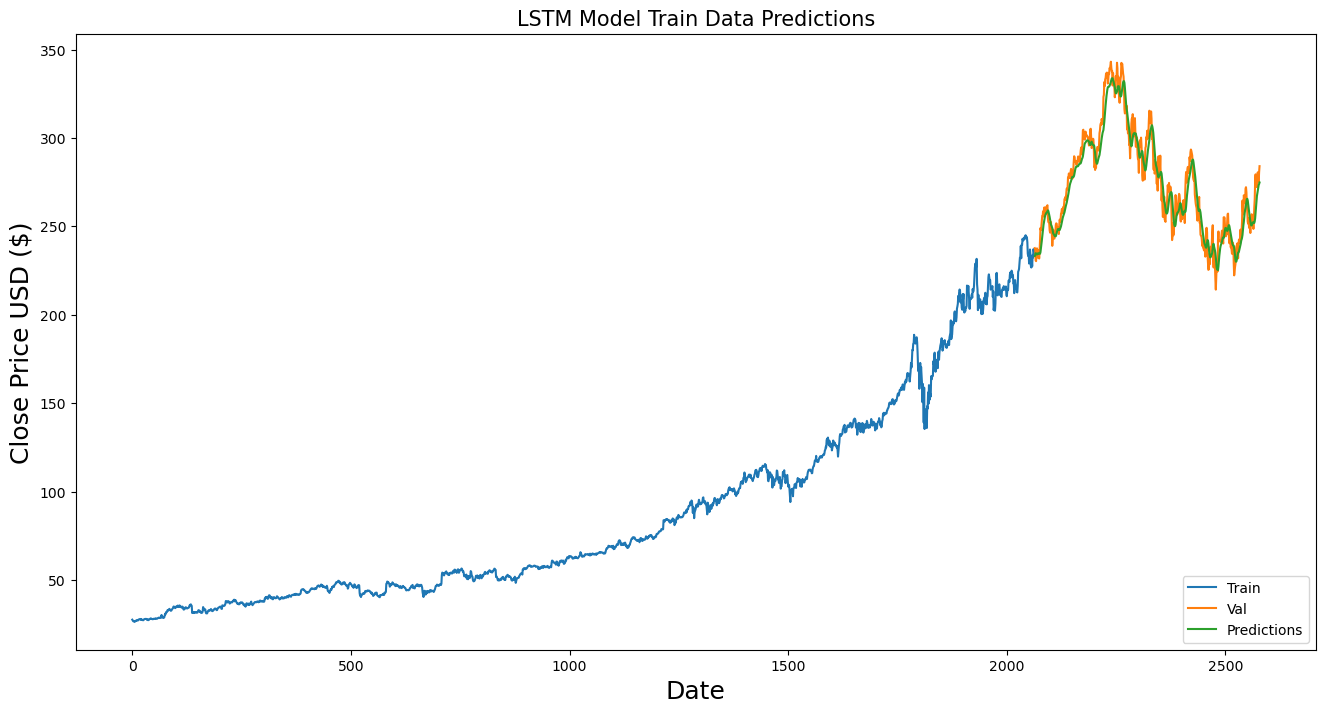

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions1
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model Train Data Predictions', size=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Predict stock price using test data

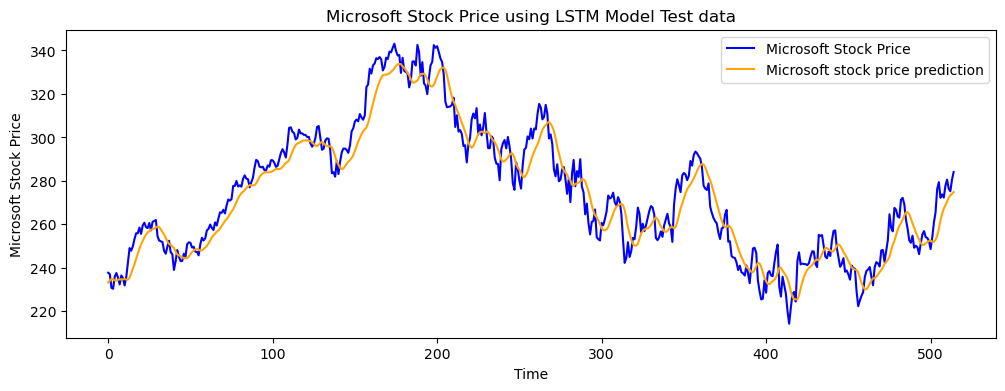

In [ ]:
# Predict the stock prices

plt.figure(figsize=(12, 4))

real_stock_price = y_test[:]
plt.plot(real_stock_price, color='blue', label='Microsoft Stock Price')
plt.plot(predictions1, color='orange', label='Microsoft stock price prediction')
plt.title('Microsoft Stock Price using LSTM Model Test data')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()

## CNN LSTM MODEL

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten

In [ ]:
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, activation='tanh', input_shape=(x_train.shape[1], 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(LSTM(50, activation='tanh', return_sequences=True))
model2.add(LSTM(50, activation='tanh'))
model2.add(Dense(1))

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['MAE'])

model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 58, 64)            256       
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 29, 64)           0         
 g1D)                                                            
                                                                 
 lstm_35 (LSTM)              (None, 29, 50)            23000     
                                                                 
 lstm_36 (LSTM)              (None, 50)                20200     
                                                                 
 dense_25 (Dense)            (None, 1)                 51        
                                                                 
Total params: 43,507
Trainable params: 43,507
Non-trainable params: 0
_________________________________________________

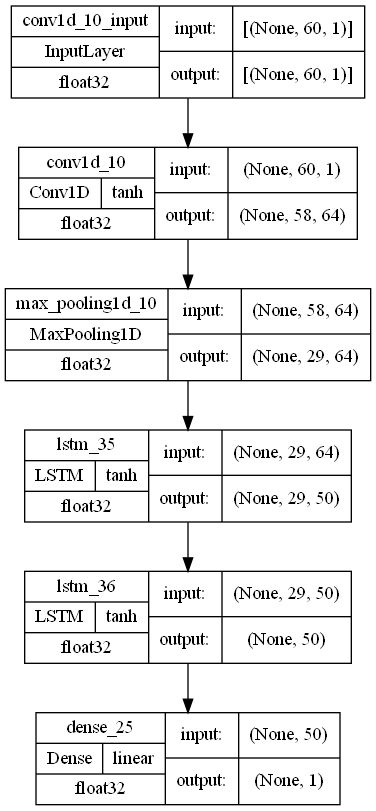

In [ ]:
tf.keras.utils.plot_model(
	model2,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)

In [ ]:
# Train the model
history2 = model2.fit(x_train, y_train,epochs=50, batch_size=32 , validation_split=0.25,  verbose=1 , shuffle=True)

Epoch 1/50
47/47 [==============================] - 3s 27ms/step - loss: 0.0021 - MAE: 0.0270 - val_loss: 8.3864e-04 - val_MAE: 0.0222
Epoch 2/50
47/47 [==============================] - 1s 17ms/step - loss: 6.7665e-05 - MAE: 0.0061 - val_loss: 8.6514e-04 - val_MAE: 0.0222
Epoch 3/50
47/47 [==============================] - 1s 17ms/step - loss: 5.3115e-05 - MAE: 0.0052 - val_loss: 7.0972e-04 - val_MAE: 0.0190
Epoch 4/50
47/47 [==============================] - 1s 17ms/step - loss: 5.1526e-05 - MAE: 0.0052 - val_loss: 7.5225e-04 - val_MAE: 0.0199
Epoch 5/50
47/47 [==============================] - 1s 18ms/step - loss: 5.3108e-05 - MAE: 0.0052 - val_loss: 8.0771e-04 - val_MAE: 0.0208
Epoch 6/50
47/47 [==============================] - 1s 17ms/step - loss: 4.9031e-05 - MAE: 0.0051 - val_loss: 0.0012 - val_MAE: 0.0273
Epoch 7/50
47/47 [==============================] - 1s 18ms/step - loss: 4.9752e-05 - MAE: 0.0051 - val_loss: 8.6212e-04 - val_MAE: 0.0217
Epoch 8/50
47/47 [=================

## Evaluation Metrics

In [ ]:
predictions2 = model2.predict(x_test)
predictions2 = scaler.inverse_transform(predictions2)
#predictions

17/17 [==============================] - 1s 6ms/step


In [ ]:
# Model Accuracy

print('MAE =',history2.history['MAE'][-1])
print('LOSS =',history2.history['loss'][-1])

MAE = 0.003856693161651492
LOSS = 2.8419215595931746e-05


In [ ]:
rmse = np.sqrt(np.mean(predictions2 - y_test)**2)
mse = np.mean(predictions2 - y_test)**2
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predictions2, multioutput='variance_weighted')
print('RMSE : ',rmse)
print('MSE : ',mse)
print('R2 : ',R2)

RMSE :  14.491268002408223
MSE :  209.9968483176204
R2 :  0.6760112846567832


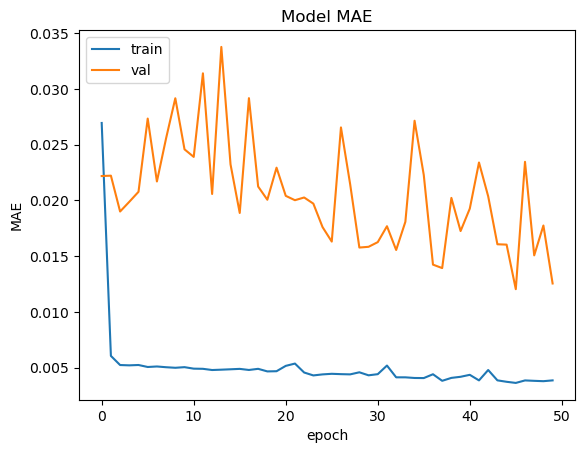

In [ ]:
MAE = history2.history['MAE']
val_MAE = history2.history['val_MAE']
plt.plot(history2.history['MAE'])
plt.plot(history2.history['val_MAE'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('model_accuracy.png')
plt.show()

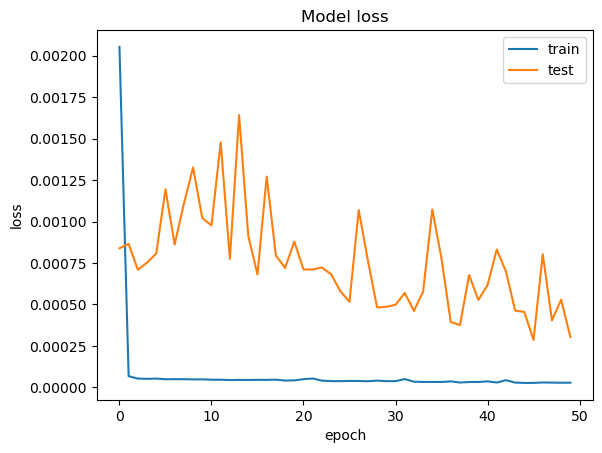

In [ ]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

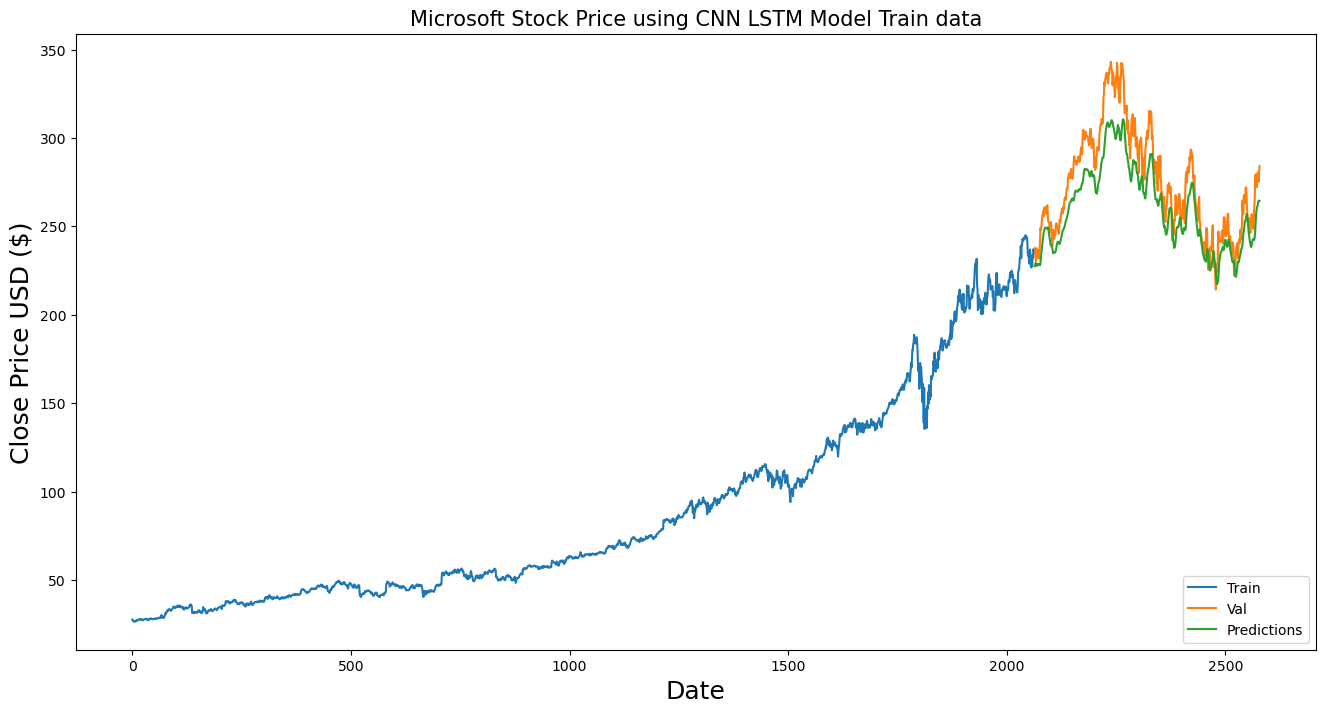

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions2
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Microsoft Stock Price using CNN LSTM Model Train data', size=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

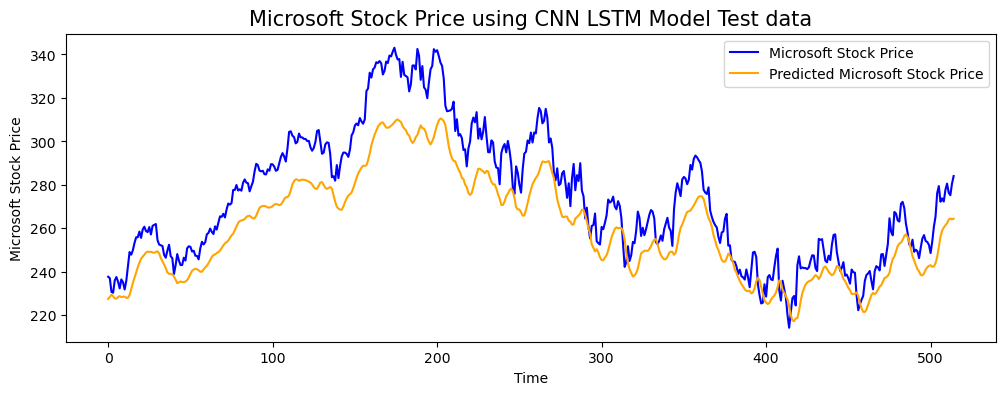

In [ ]:
# Predict the stock prices

plt.figure(figsize=(12, 4))

real_stock_price = y_test[:]
plt.plot(real_stock_price, color='blue', label='Microsoft Stock Price')
plt.plot(predictions2, color='orange', label='Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price using CNN LSTM Model Test data', size=15)
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()

## BI LSTM MODEL

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN,Dropout
from tensorflow.keras.callbacks import History
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from subprocess import check_output
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
# define model
model3 = Sequential()
model3.add(Bidirectional(LSTM(50, activation='tanh'), input_shape=(x_train.shape[1], 1)))
model3.add(Dropout(0.2))
model3.build((x_train.shape[1],1)) 
model3.add(Dense(1))

model3.compile(loss='mse',  optimizer='adam', metrics=['MAE'])

model3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_9 (Bidirectio  (None, 100)              20800     
 nal)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 100)               0         
                                                                 
 dense_26 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


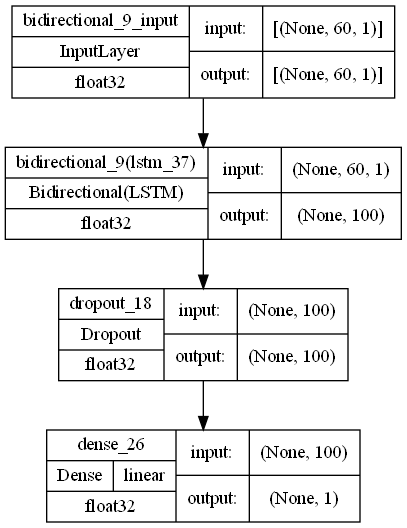

In [ ]:
tf.keras.utils.plot_model(
	model3,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)

In [ ]:
history3 = model3.fit(x_train, y_train, epochs=50, batch_size=32,validation_split=0.25,  verbose=1 , shuffle=True)

Epoch 1/50
47/47 [==============================] - 3s 28ms/step - loss: 0.0017 - MAE: 0.0268 - val_loss: 0.0014 - val_MAE: 0.0288
Epoch 2/50
47/47 [==============================] - 1s 19ms/step - loss: 2.1698e-04 - MAE: 0.0105 - val_loss: 9.2970e-04 - val_MAE: 0.0246
Epoch 3/50
47/47 [==============================] - 1s 18ms/step - loss: 2.0068e-04 - MAE: 0.0099 - val_loss: 7.5136e-04 - val_MAE: 0.0217
Epoch 4/50
47/47 [==============================] - 1s 18ms/step - loss: 1.7686e-04 - MAE: 0.0095 - val_loss: 6.7845e-04 - val_MAE: 0.0205
Epoch 5/50
47/47 [==============================] - 1s 18ms/step - loss: 1.6287e-04 - MAE: 0.0091 - val_loss: 5.9826e-04 - val_MAE: 0.0189
Epoch 6/50
47/47 [==============================] - 1s 18ms/step - loss: 1.5788e-04 - MAE: 0.0091 - val_loss: 8.3037e-04 - val_MAE: 0.0228
Epoch 7/50
47/47 [==============================] - 1s 18ms/step - loss: 1.2816e-04 - MAE: 0.0081 - val_loss: 5.1993e-04 - val_MAE: 0.0174
Epoch 8/50
47/47 [=================

## Model Evaluation

In [ ]:
predictions3 = model3.predict(x_test)
predictions3 = scaler.inverse_transform(predictions3)

17/17 [==============================] - 0s 6ms/step


In [ ]:
# Model Accuracy

print('MAE =',history3.history['MAE'][-1])

print('LOSS =',history3.history['loss'][-1])

MAE = 0.0049415649846196175
LOSS = 4.929312490276061e-05


In [ ]:
rmse = np.sqrt(np.mean(predictions3 - y_test)**2)
mse = np.mean(predictions3 - y_test)**2
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predictions3, multioutput='variance_weighted')
print('RMSE : ',rmse)
print('MSE : ',mse)
print('R2 : ',R2)

RMSE :  6.270157067752579
MSE :  39.31486965428762
R2 :  0.8685028494168638


dict_keys(['loss', 'MAE', 'val_loss', 'val_MAE'])


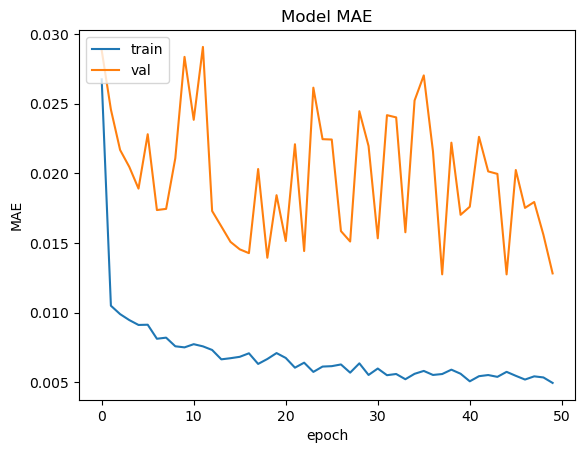

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense

# list all data in history
print(history3.history.keys())

MAE = history3.history['MAE']
val_MAE = history3.history['val_MAE']
plt.plot(history3.history['MAE'])
plt.plot(history3.history['val_MAE'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('model_accuracy.png')
plt.show()

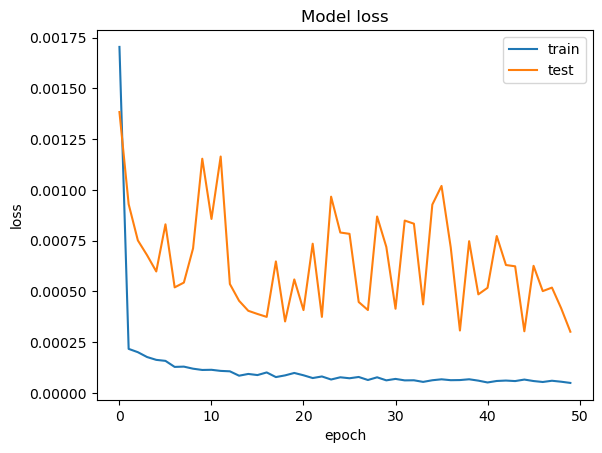

In [ ]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

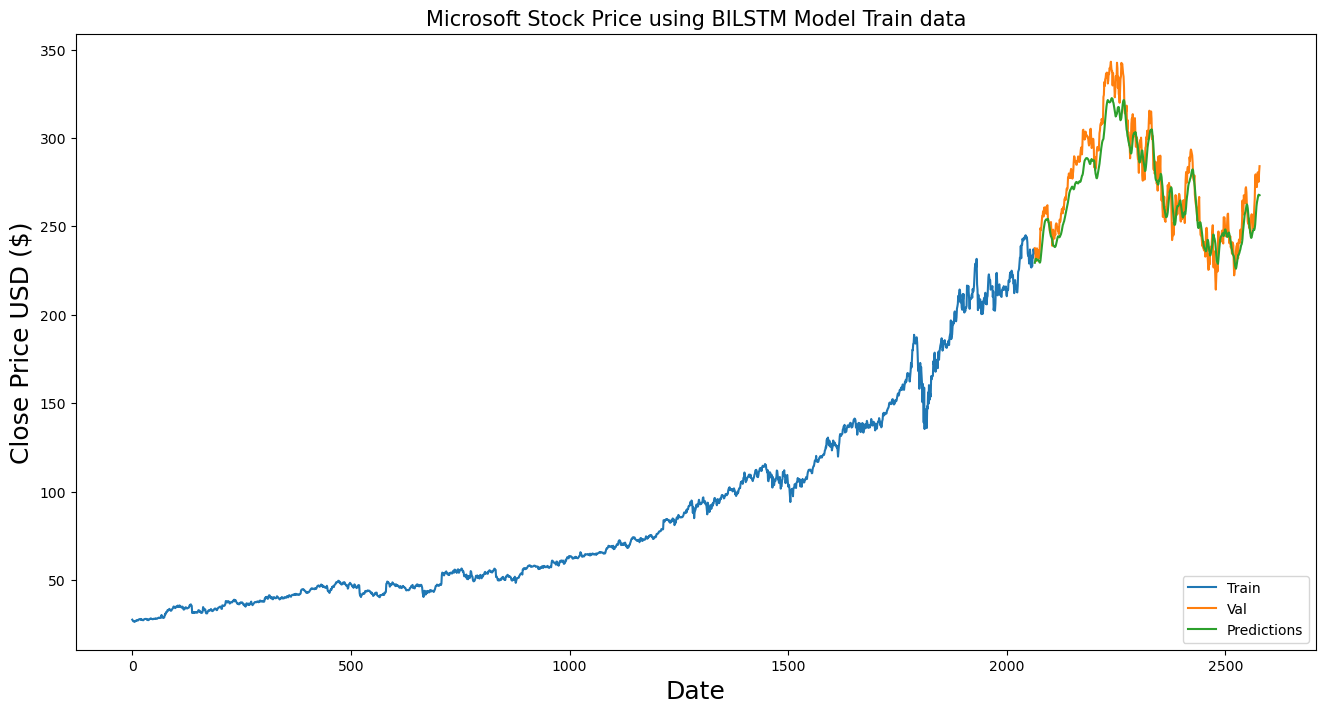

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions3
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Microsoft Stock Price using BILSTM Model Train data', size = 15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

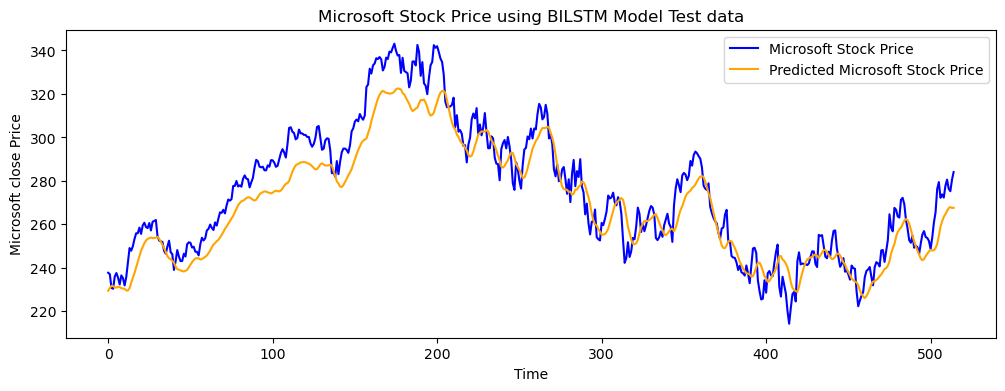

In [ ]:
# Predict the stock prices

plt.figure(figsize=(12, 4))

real_stock_price = y_test[:]
plt.plot(real_stock_price, color='blue', label='Microsoft Stock Price')
plt.plot(predictions3, color='orange', label='Predicted Microsoft Stock Price')

plt.title('Microsoft Stock Price using BILSTM Model Test data')
plt.xlabel('Time')
plt.ylabel('Microsoft close Price')
plt.legend()
plt.show()

## CNN BILSTM MODEL

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, Bidirectional

In [ ]:
# Build the model
model4 = Sequential()
model4.add(Conv1D(filters=64, kernel_size=3, activation='tanh', input_shape=(x_train.shape[1], 1)))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Bidirectional(LSTM(64, return_sequences=True)))
model4.add(Dropout(0.2))
model4.add(Bidirectional(LSTM(64)))
model4.add(Dense(1))

model4.compile(loss='mse',  optimizer='adam', metrics=['MAE'])

model4.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 58, 64)            256       
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 29, 64)           0         
 g1D)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 29, 128)          66048     
 onal)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 29, 128)           0         
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                     

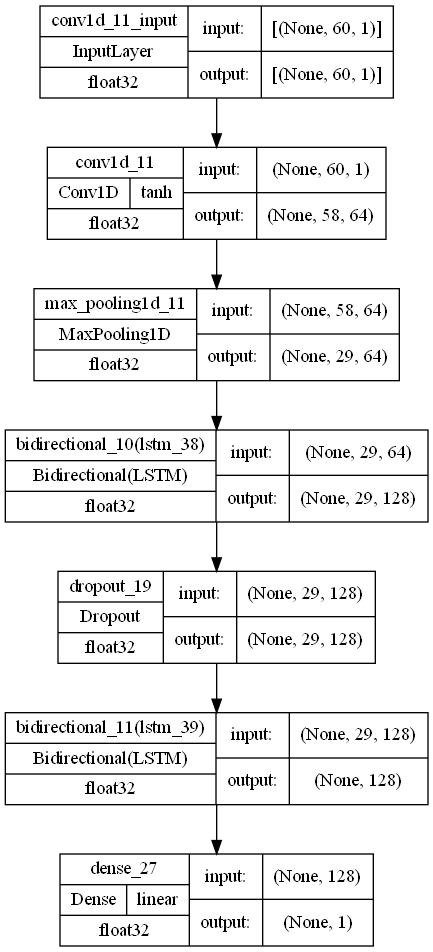

In [ ]:
tf.keras.utils.plot_model(
	model4,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)

In [ ]:
history4 = model4.fit(x_train, y_train, epochs=50, batch_size=32,validation_split=0.25,  verbose=1 , shuffle=True)

Epoch 1/50
47/47 [==============================] - 5s 41ms/step - loss: 0.0013 - MAE: 0.0209 - val_loss: 9.0780e-04 - val_MAE: 0.0230
Epoch 2/50
47/47 [==============================] - 1s 26ms/step - loss: 7.8749e-05 - MAE: 0.0066 - val_loss: 8.9410e-04 - val_MAE: 0.0231
Epoch 3/50
47/47 [==============================] - 1s 26ms/step - loss: 7.0103e-05 - MAE: 0.0061 - val_loss: 8.4408e-04 - val_MAE: 0.0223
Epoch 4/50
47/47 [==============================] - 1s 26ms/step - loss: 6.8922e-05 - MAE: 0.0060 - val_loss: 8.3826e-04 - val_MAE: 0.0221
Epoch 5/50
47/47 [==============================] - 1s 26ms/step - loss: 6.4815e-05 - MAE: 0.0059 - val_loss: 9.4032e-04 - val_MAE: 0.0239
Epoch 6/50
47/47 [==============================] - 1s 26ms/step - loss: 6.5726e-05 - MAE: 0.0060 - val_loss: 0.0014 - val_MAE: 0.0300
Epoch 7/50
47/47 [==============================] - 1s 26ms/step - loss: 5.2298e-05 - MAE: 0.0053 - val_loss: 7.8219e-04 - val_MAE: 0.0212
Epoch 8/50
47/47 [=================

## Model Evaluation

In [ ]:
predictions4 = model4.predict(x_test)
predictions4 = scaler.inverse_transform(predictions4)

17/17 [==============================] - 0s 12ms/step


In [ ]:
# Model Accuracy

print('MAE =',history4.history['MAE'][-1])

print('LOSS =',history4.history['loss'][-1])

MAE = 0.0037112226709723473
LOSS = 2.6556523152976297e-05


In [ ]:
rmse = np.sqrt(np.mean(predictions4 - y_test)**2)
mse = np.mean(predictions4 - y_test)**2
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predictions4, multioutput='variance_weighted')
print('RMSE : ',rmse)
print('MSE : ',mse)
print('R2 : ',R2)

RMSE :  17.294883772470417
MSE :  299.1130047032606
R2 :  0.5765541678562096


dict_keys(['loss', 'MAE', 'val_loss', 'val_MAE'])


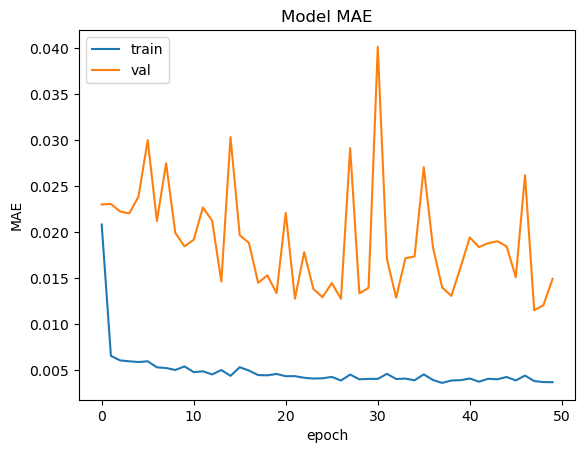

In [ ]:
# list all data in history
print(history4.history.keys())

MAE = history4.history['MAE']
val_MAE = history4.history['val_MAE']
plt.plot(history4.history['MAE'])
plt.plot(history4.history['val_MAE'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('model_accuracy.png')
plt.show()

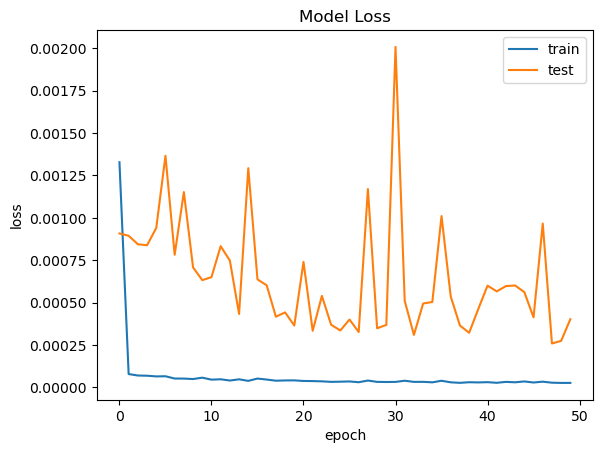

In [ ]:
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

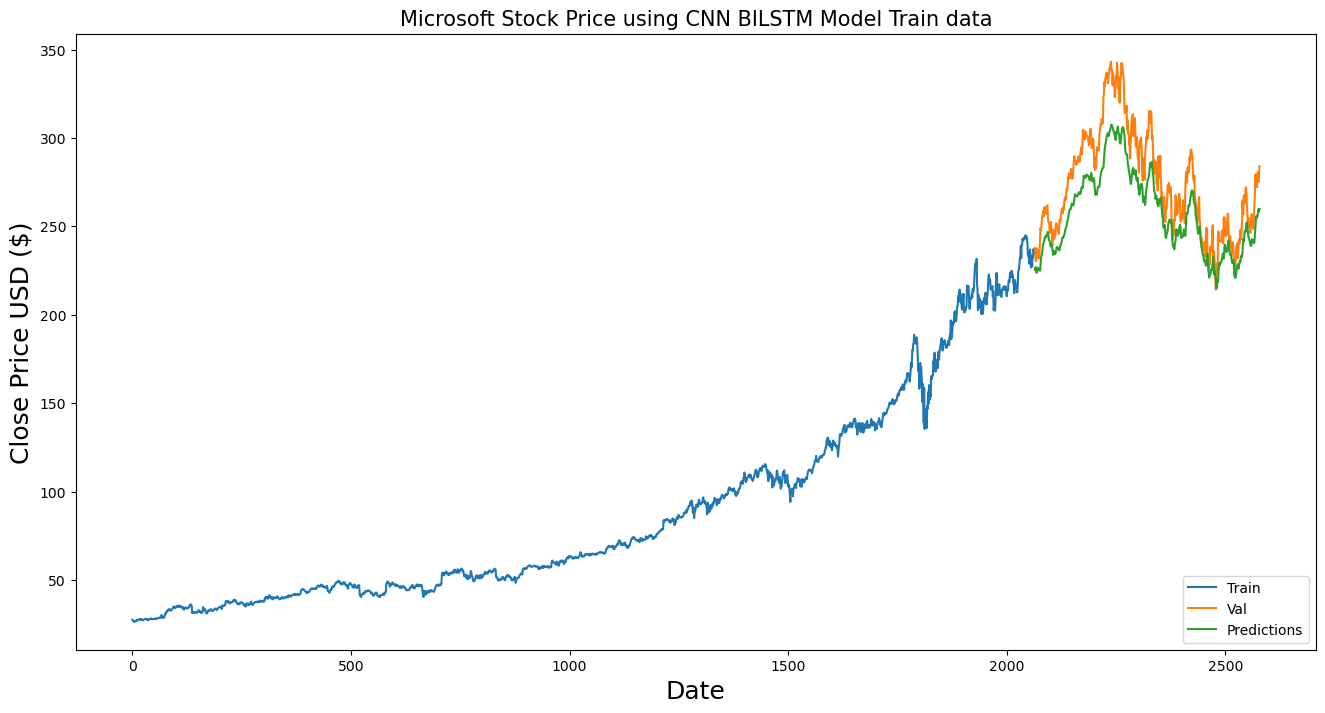

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions4
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Microsoft Stock Price using CNN BILSTM Model Train data', size = 15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

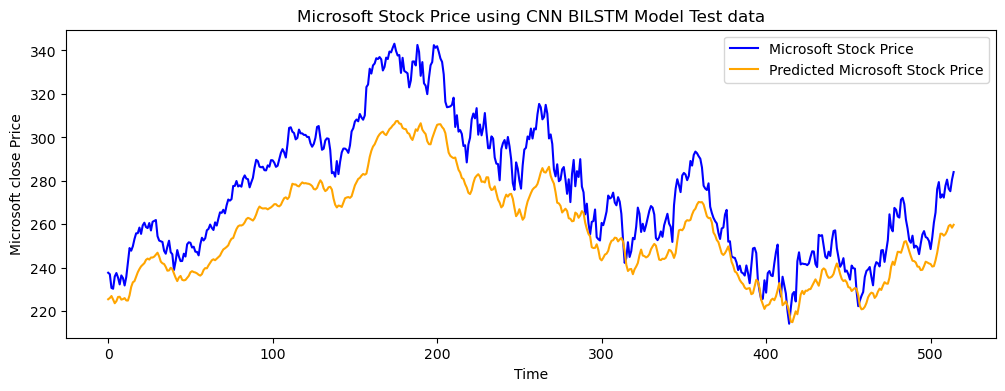

In [ ]:
# Predict the stock prices

plt.figure(figsize=(12, 4))

real_stock_price = y_test[:]
plt.plot(real_stock_price, color='blue', label='Microsoft Stock Price')
plt.plot(predictions4, color='orange', label='Predicted Microsoft Stock Price')

plt.title('Microsoft Stock Price using CNN BILSTM Model Test data')
plt.xlabel('Time')
plt.ylabel('Microsoft close Price')
plt.legend()
plt.show()

## GRU Model

In [ ]:
#loading libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# The GRU architecture
model5 = Sequential()
# First GRU layer with Dropout regularisation
model5.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
#model5.add(Dropout(0.2))
# Second GRU layer
model5.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
#model5.add(Dropout(0.2))
# Third GRU layer
model5.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
#model5.add(Dropout(0.2))
# Fourth GRU layer
model5.add(GRU(units=50, activation='tanh'))
model5.add(Dropout(0.2))
# The output layer
model5.add(Dense(units=1))
# Compiling the RNN
model5.compile(loss='mse',  optimizer='adam', metrics=['MAE'])

model5.summary()
#model5.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error',metrics = ["MAE"])

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 60, 50)            7950      
                                                                 
 gru_11 (GRU)                (None, 60, 50)            15300     
                                                                 
 gru_12 (GRU)                (None, 60, 50)            15300     
                                                                 
 gru_13 (GRU)                (None, 50)                15300     
                                                                 
 dropout_29 (Dropout)        (None, 50)                0         
                                                                 
 dense_30 (Dense)            (None, 1)                 51        
                                                                 
Total params: 53,901
Trainable params: 53,901
Non-tra

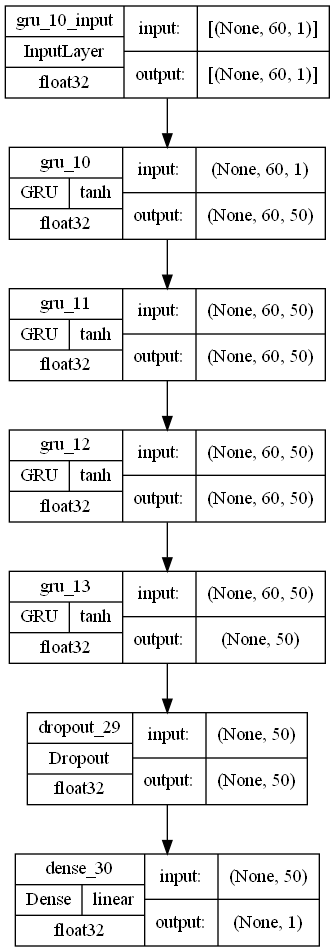

In [ ]:
tf.keras.utils.plot_model(
	model5,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)

In [ ]:
history5 = model5.fit(x_train, y_train, epochs=50, batch_size=32,validation_split=0.25,  verbose=1 , shuffle=True)

Epoch 1/50
47/47 [==============================] - 7s 69ms/step - loss: 0.0015 - MAE: 0.0245 - val_loss: 3.8210e-04 - val_MAE: 0.0137
Epoch 2/50
47/47 [==============================] - 3s 54ms/step - loss: 1.9614e-04 - MAE: 0.0100 - val_loss: 5.3170e-04 - val_MAE: 0.0180
Epoch 3/50
47/47 [==============================] - 3s 64ms/step - loss: 1.4977e-04 - MAE: 0.0088 - val_loss: 5.9216e-04 - val_MAE: 0.0190
Epoch 4/50
47/47 [==============================] - 3s 56ms/step - loss: 1.7809e-04 - MAE: 0.0096 - val_loss: 5.9322e-04 - val_MAE: 0.0192
Epoch 5/50
47/47 [==============================] - 3s 54ms/step - loss: 1.4333e-04 - MAE: 0.0086 - val_loss: 3.3383e-04 - val_MAE: 0.0129
Epoch 6/50
47/47 [==============================] - 2s 52ms/step - loss: 1.4941e-04 - MAE: 0.0087 - val_loss: 3.1378e-04 - val_MAE: 0.0124
Epoch 7/50
47/47 [==============================] - 3s 57ms/step - loss: 1.4466e-04 - MAE: 0.0084 - val_loss: 3.1200e-04 - val_MAE: 0.0126
Epoch 8/50
47/47 [=============

In [ ]:
predictions5 = model5.predict(x_test)
predictions5 = scaler.inverse_transform(predictions5)

17/17 [==============================] - 1s 18ms/step


In [ ]:
# Model performance

print('MAE =',history5.history['MAE'][-1])

print('LOSS =',history5.history['loss'][-1])

MAE = 0.004897931590676308
LOSS = 4.8686317313695326e-05


In [ ]:
rmse = np.sqrt(np.mean(predictions5 - y_test)**2)
mse = np.mean(predictions5 - y_test)**2
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predictions5, multioutput='variance_weighted')
print('RMSE : ',rmse)
print('MSE : ',mse)
print('R2 : ',R2)

RMSE :  2.454215010855962
MSE :  6.0231713195107295
R2 :  0.9585839154493931


dict_keys(['loss', 'MAE', 'val_loss', 'val_MAE'])


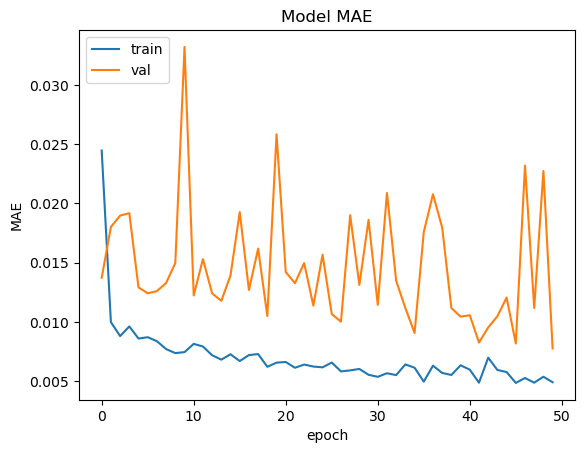

In [ ]:
# list all data in history
print(history5.history.keys())

MAE = history5.history['MAE']
val_MAE = history5.history['val_MAE']
plt.plot(history5.history['MAE'])
plt.plot(history5.history['val_MAE'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('model_accuracy.png')
plt.show()

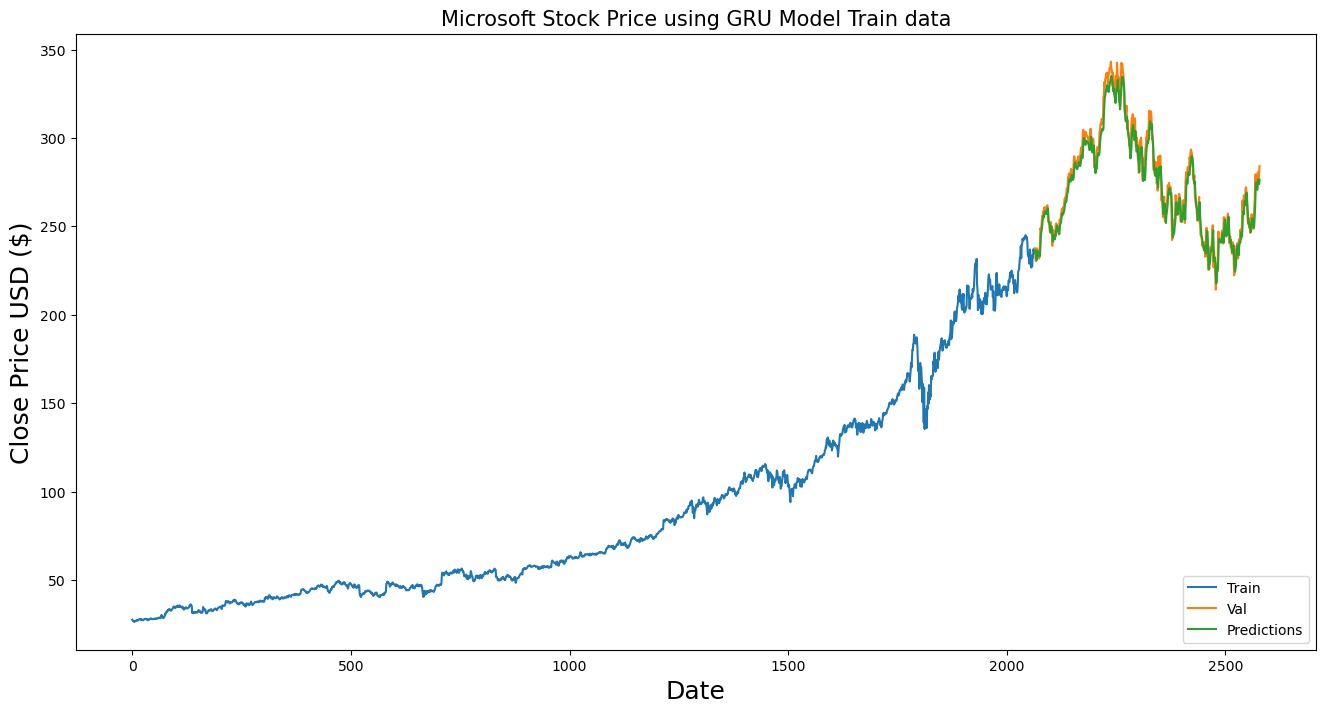

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions5
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Microsoft Stock Price using GRU Model Train data', size = 15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

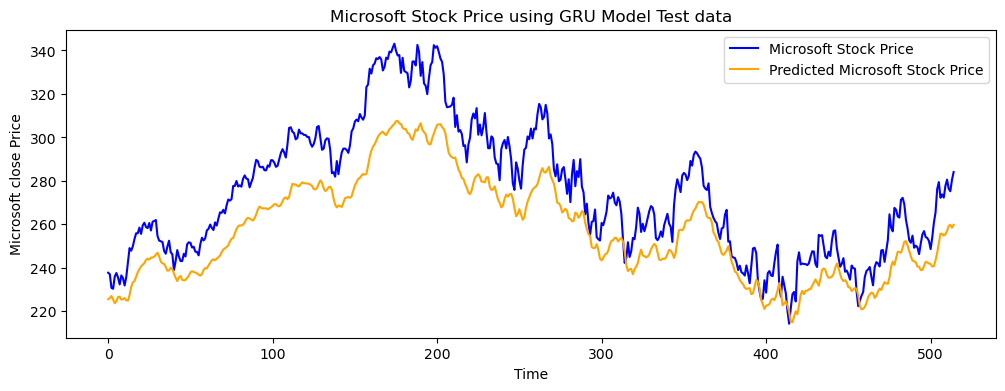

In [ ]:
# Predict the stock prices

plt.figure(figsize=(12, 4))

real_stock_price = y_test[:]
plt.plot(real_stock_price, color='blue', label='Microsoft Stock Price')
plt.plot(predictions5, color='orange', label='Predicted Microsoft Stock Price')

plt.title('Microsoft Stock Price using GRU Model Test data')
plt.xlabel('Time')
plt.ylabel('Microsoft close Price')
plt.legend()
plt.show()